In [1]:
import platform
 
print(platform.python_version()) 


3.6.5


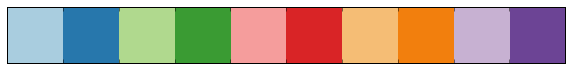

In [6]:
%matplotlib inline
sns.palplot(qual_palette)
plt.show()

In [9]:
qual_palette

[(0.66294119656085959, 0.80411765873432151, 0.87823530137538919),
 (0.15480123151605041, 0.46756247850755872, 0.67824761366873398),
 (0.69069359706897349, 0.8519531033436456, 0.55998080282819052),
 (0.23127105394706995, 0.61066207408028494, 0.20382468880099402),
 (0.96375778759665331, 0.61708652743083603, 0.61368168334312323),
 (0.85129104817322654, 0.14380315431485002, 0.14972702928910084),
 (0.9638700506397907, 0.74312265876899741, 0.46190465573440564),
 (0.95016839677796661, 0.50114417558207225, 0.054860438336344242),
 (0.78101500660181078, 0.69456518444944848, 0.82635756508392477),
 (0.42511726825552787, 0.26878508444218019, 0.58622455149012453)]

In [10]:
for rgb in qual_palette:
    print(matplotlib.colors.rgb2hex(rgb))

#a9cde0
#2777ad
#b0d98f
#3b9c34
#f69d9c
#d92526
#f6bd76
#f2800e
#c7b1d3
#6c4595


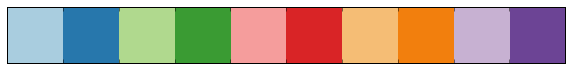

In [11]:
sns.palplot(qual_palette)
plt.show()